In [7]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

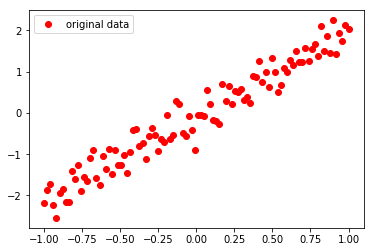

In [9]:
train_x = np.linspace(-1,1,100)
train_y = 2*train_x + np.random.randn(*train_x.shape) * 0.3
plt.plot(train_x,train_y,'ro',label = 'original data')
plt.legend()
plt.show

In [18]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(tf.random_normal([1]),name = 'weight')
b = tf.Variable(tf.zeros([1]),name = 'bias')
z = tf.multiply(X,W) + b

In [40]:
cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
plotdata = {"batchsize":[],"loss":[]}
def moving_average(a,w = 10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx - w):idx])/w for idx,val in enumerate(a)]

Epoch: 1 cost = 1.33916 W = [ 0.33644974] b = [ 0.44091809]
Epoch: 3 cost = 0.184702 W = [ 1.58975208] b = [ 0.09728862]
Epoch: 5 cost = 0.0920717 W = [ 1.9287554] b = [-0.03049137]
Epoch: 7 cost = 0.0861301 W = [ 2.01666188] b = [-0.0641861]
Epoch: 9 cost = 0.0858184 W = [ 2.03939509] b = [-0.07290933]
Epoch: 11 cost = 0.0858197 W = [ 2.04527426] b = [-0.07516541]
Epoch: 13 cost = 0.0858255 W = [ 2.04679465] b = [-0.07574877]
Epoch: 15 cost = 0.0858274 W = [ 2.04718757] b = [-0.07589961]
Epoch: 17 cost = 0.0858279 W = [ 2.04728937] b = [-0.07593857]
Epoch: 19 cost = 0.085828 W = [ 2.04731417] b = [-0.0759481]
Finished!
Epoch: 20 cost = 0.085828 W = [ 2.0473187] b = [-0.07594988]


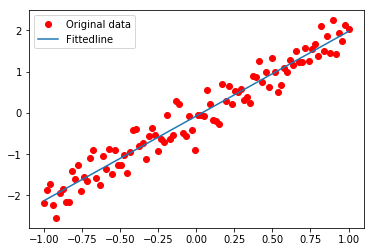

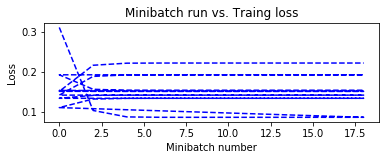

x = 3,z = [ 6.06600666]


In [51]:
init = tf.global_variables_initializer()
training_epochs = 20
display_step = 2

with tf.Session() as sess:
    sess.run(init)   
    for epoch in range(training_epochs):
        for x,y in zip(train_x,train_y):
            sess.run(optimizer,feed_dict = {X:x,Y:y})
        if epoch % display_step == 0:
            loss = sess.run(cost,feed_dict = {X:train_x,Y:train_y})
            print('Epoch:',epoch+1,'cost =',loss,'W =',sess.run(W),'b =',sess.run(b))
            if not (loss == 'NA'):
                plotdata['batchsize'].append(epoch)
                plotdata['loss'].append(loss)
    print('Finished!')
    print('Epoch:',epoch+1,'cost =',loss,'W =',sess.run(W),'b =',sess.run(b))
    plt.plot(train_x,train_y,'ro',label = 'Original data')
    plt.plot(train_x,sess.run(W) * train_x + sess.run(b),label = 'Fittedline')
    plt.legend()
    plt.show()
    plotdata['avgloss'] = moving_average(plotdata['loss'])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata['batchsize'],plotdata['avgloss'],'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Traing loss')
    plt.show()
    print("x = 3,z =",sess.run(z,feed_dict = {X: 3}))